<a href="https://colab.research.google.com/github/abhishekmishra2612/Pneumonia-Detection/blob/master/PNEUMONIA_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,BatchNormalization
from keras.models import Sequential 

Using TensorFlow backend.


In [0]:
x_train=np.load("/content/drive/My Drive/PNEUMONIA_features.npy")
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(5216, 2048)


In [0]:
y_train=np.load("/content/drive/My Drive/PNEUMONIA_labels.npy")
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(5216,)


In [0]:
x_val=np.load("/content/drive/My Drive/PNEUMONIA_features_test.npy")
x_val.shape

(624, 2048)

In [0]:
y_val=np.load("/content/drive/My Drive/PNEUMONIA_labels_test.npy")
y_val.shape

(624,)

In [0]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(512,activation="relu",input_shape=(2048,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               1049088   
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 513       
Total params: 1,051,649
Trainable params: 1,050,625
Non-trainable params: 1,024
_________________________________________________________________


In [0]:
import tensorflow as tf
from sklearn import metrics
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [0]:
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adam(1e-4),metrics=["accuracy"])
mcp_save = keras.callbacks.ModelCheckpoint('/content/drive/My Drive/best_pneumonia_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [0]:
model_history=model.fit(x_train,y_train,batch_size=32,epochs=50,verbose=1,callbacks=[mcp_save],validation_data=(x_val,y_val))

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 0.3791 - accuracy: 0.8424 - val_loss: 0.3660 - val_accuracy: 0.8686
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9231 - val_loss: 0.4374 - val_accuracy: 0.7901
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.9459 - val_loss: 0.3868 - val_accuracy: 0.8317
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9515 - val_loss: 0.4709 - val_accuracy: 0.8029
Epoch 5/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 0.9599 - val_loss: 0.3549 - val_accuracy: 0.8446
Epoch 6/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 0.9655 - val_loss: 0.5295 - val_accuracy: 0.7997
Epoch 7/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.9682 - val_loss: 0.4440 - val_accuracy: 0.8205
Epoch 

In [0]:
# save model and weights.
model_json = model.to_json()
with open("/content/drive/My Drive/pneumonia_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/pneumonia_model_weights.h5")

In [0]:
# load json and create model
json_file = open('/content/drive/My Drive/pneumonia_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/pneumonia_model_weights.h5")

In [0]:
loaded_model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adam(1e-4),metrics=["accuracy"])
score=loaded_model.evaluate(x_val,y_val,verbose=1)

20/20 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.8045


In [0]:
pred=loaded_model.predict(x_train)
pred_train=[]
for i in pred:
  if(i>0.5):
    pred_train.append(1)
  else:
    pred_train.append(0)  

In [0]:
pred=loaded_model.predict(x_val)
pred_val=[]
for i in pred:
  if(i>0.5):
    pred_val.append(1)
  else:
    pred_val.append(0)  

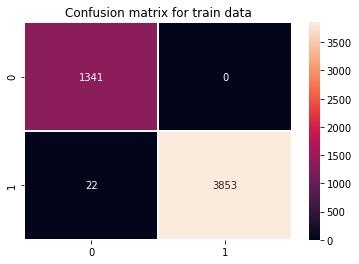

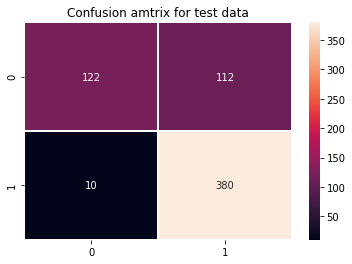

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_train,np.array(pred_train)),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y_val,np.array(pred_val)),annot=True,fmt="d",linewidths="1")
plt.title("Confusion amtrix for test data")
plt.show()

**Precision and Recall for Positive points(1) :**

In [0]:
print("Precision(Train) :",3853/(3853+0))
print("Precision(Val) :",380/(380+112))

Precision(Train) : 1.0
Precision(Val) : 0.7723577235772358


In [0]:
print("Recall(Train) :",3853/(3853+22))
print("Recall(Val) :",380/(380+10))

Recall(Train) : 0.9943225806451613
Recall(Val) : 0.9743589743589743


**Precision and Recal for Negative points(0) :**

In [0]:
print("Precision(Train) :",1341/(1341+22))
print("Precision(Val) :",122/(122+10))

Precision(Train) : 0.9838591342626559
Precision(Val) : 0.9242424242424242


In [0]:
print("Recall(Train) :",1341/(1341+0))
print("Recall(Val) :",122/(122+112))

Recall(Train) : 1.0
Recall(Val) : 0.5213675213675214
